In [2]:
# !pip3 install boto3

https://docs.aws.amazon.com/rekognition/latest/dg/images.html

In [3]:
import base64
import boto3
import json
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [18]:
FIG_SIZE = (20, 12)
image_file='people_car.jpg'

REGION='us-west-2'

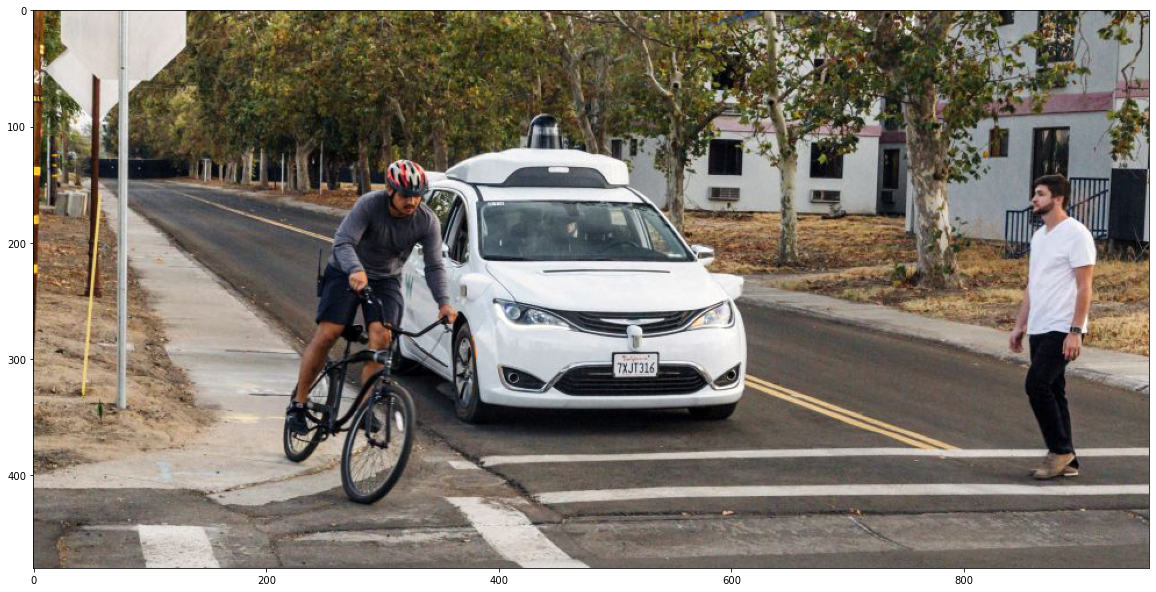

In [19]:
img = plt.imread(image_file)
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.imshow(img);

In [7]:
client=boto3.client('rekognition', region_name=REGION)

## Object and scene detection
https://docs.aws.amazon.com/rekognition/latest/dg/labels.html

In [8]:
%%time
with open(image_file, 'rb') as image:
    try:
        response = client.detect_labels(Image={'Bytes': image.read()})
    except Exception as exc:
        print(exc)

CPU times: user 184 ms, sys: 35.5 ms, total: 220 ms
Wall time: 2.83 s


In [9]:
def get_objects(response: str) -> dict:
    """Parse the data, returning detected objects only."""
    return {
        label["Name"].lower(): round(label["Confidence"], 1)
        for label in response["Labels"]
        if len(label["Instances"]) > 0
    }

In [10]:
get_objects(response)

{'person': 99.9, 'bicycle': 99.9, 'wheel': 99.5, 'car': 99.4, 'shoe': 97.6}

In [14]:
response['Labels'][0]

{'Name': 'Person',
 'Confidence': 99.85315704345703,
 'Instances': [{'BoundingBox': {'Width': 0.0759148895740509,
    'Height': 0.5483436584472656,
    'Left': 0.8748960494995117,
    'Top': 0.2920868694782257},
   'Confidence': 99.85315704345703},
  {'BoundingBox': {'Width': 0.15320314466953278,
    'Height': 0.515958845615387,
    'Left': 0.22776539623737335,
    'Top': 0.2583009898662567},
   'Confidence': 99.78672790527344}],
 'Parents': []}

## Text
https://docs.aws.amazon.com/rekognition/latest/dg/text-detecting-text-procedure.html

In [15]:
%%time
with open(image_file, 'rb') as image:
    try:
        response = client.detect_text(Image={'Bytes': image.read()})
    except Exception as exc:
        print(exc)

CPU times: user 125 ms, sys: 14.9 ms, total: 140 ms
Wall time: 2.39 s


In [21]:
response['TextDetections'][0]['DetectedText']

'7XJT316'

Has picked up the number plate

## Face detection
https://docs.aws.amazon.com/rekognition/latest/dg/faces-detect-images.html

In [22]:
%%time
with open(image_file, 'rb') as image:
    try:
        response = client.detect_faces(Image={'Bytes': image.read()})
    except Exception as exc:
        print(exc)

CPU times: user 20 ms, sys: 5.64 ms, total: 25.6 ms
Wall time: 3.51 s


In [25]:
len(response['FaceDetails'])

2

In [26]:
response['FaceDetails'][0]

{'BoundingBox': {'Width': 0.02692251279950142,
  'Height': 0.05310859531164169,
  'Left': 0.32145464420318604,
  'Top': 0.31489041447639465},
 'Landmarks': [{'Type': 'eyeLeft',
   'X': 0.3345753252506256,
   'Y': 0.3332329988479614},
  {'Type': 'eyeRight', 'X': 0.3449747860431671, 'Y': 0.33522462844848633},
  {'Type': 'mouthLeft', 'X': 0.33334171772003174, 'Y': 0.35505616664886475},
  {'Type': 'mouthRight', 'X': 0.3421221077442169, 'Y': 0.3566909730434418},
  {'Type': 'nose', 'X': 0.3405616879463196, 'Y': 0.34920957684516907}],
 'Pose': {'Roll': -2.723209857940674,
  'Yaw': 20.657684326171875,
  'Pitch': -32.434539794921875},
 'Quality': {'Brightness': 39.38178634643555, 'Sharpness': 38.89601135253906},
 'Confidence': 99.99626922607422}